#### install and import pandas

In [139]:
!pip install pandas
import pandas as pd

# Data Selection
Download fruits.csv from Canvas first.

Note: fruits.csv must be in the same folder as SU4.ipynb

In [140]:
Imports = pd.read_csv("./fruits.csv")
Imports

,Fruits,Prices,Country
0,Apple,1.2,Africa
1,Orange,0.7,Russia
2,Banana,0.9,New Zealand


In [141]:
Imports[["Fruits", "Prices"]]


,Fruits,Prices
0,Apple,1.2
1,Orange,0.7
2,Banana,0.9


In [142]:
Imports[["Fruits", "Country"]]

,Fruits,Country
0,Apple,Africa
1,Orange,Russia
2,Banana,New Zealand


In [143]:
Imports["Fruits"]  #This is 1D pandas.Series with labels and values, not a dataframe

0     Apple
1    Orange
2    Banana
Name: Fruits, dtype: object

In [144]:
# select one row
Imports.iloc[1]

Fruits     Orange
Prices        0.7
Country    Russia
Name: 1, dtype: object

In [145]:
# select multiple rows with open-end indexing
Imports.iloc[0:1]

#Q: is the row with row index 1 included?

,Fruits,Prices,Country
0,Apple,1.2,Africa


In [146]:
# select multiple rows with a list of index (not necessarily consecutive)
Imports.iloc[[0,2], :]

,Fruits,Prices,Country
0,Apple,1.2,Africa
2,Banana,0.9,New Zealand


In [147]:
Imports.iloc[:, 2]

0         Africa
1         Russia
2    New Zealand
Name: Country, dtype: object

In [148]:
Imports.iloc[2]  #is this the same as above?

# Imports.iloc[:, 2] is picking column index 2

Fruits          Banana
Prices             0.9
Country    New Zealand
Name: 2, dtype: object

In [149]:
Imports

,Fruits,Prices,Country
0,Apple,1.2,Africa
1,Orange,0.7,Russia
2,Banana,0.9,New Zealand


In [150]:
Imports.set_index('Fruits', inplace = True)
# use one column as the row index label
# this line can only be executed once
# "Fruits" column will become row index label and no longer a column

In [151]:
Imports

,Prices,Country
Fruits,,
Apple,1.2,Africa
Orange,0.7,Russia
Banana,0.9,New Zealand


In [152]:
# can I still use iloc[0:1]?
Imports.iloc[0:1]

,Prices,Country
Fruits,,
Apple,1.2,Africa


In [153]:
Imports.iloc[0:1, 1]  # get Country column

Fruits
Apple    Africa
Name: Country, dtype: object

In [154]:
Imports.loc[['Apple','Orange'], :]  # list of row labels, all columns

,Prices,Country
Fruits,,
Apple,1.2,Africa
Orange,0.7,Russia


#### select cells by [ ], iloc and loc

In [155]:
Imports.iloc[0:2, 0:1]
# what row? index 0 and 1
# what col? index 0

,Prices
Fruits,
Apple,1.2
Orange,0.7


In [156]:
Imports.loc[["Apple","Banana"], ["Prices","Country"]]  #my personal fav

,Prices,Country
Fruits,,
Apple,1.2,Africa
Banana,0.9,New Zealand


In [157]:
Imports

,Prices,Country
Fruits,,
Apple,1.2,Africa
Orange,0.7,Russia
Banana,0.9,New Zealand


In [158]:
Imports[["Prices","Country"]].iloc[0:2]

,Prices,Country
Fruits,,
Apple,1.2,Africa
Orange,0.7,Russia


In [159]:
Imports.loc[["Apple","Banana"]].iloc[0:, 0:2]

,Prices,Country
Fruits,,
Apple,1.2,Africa
Banana,0.9,New Zealand


#### Boolean Mask

In [160]:
Imports

,Prices,Country
Fruits,,
Apple,1.2,Africa
Orange,0.7,Russia
Banana,0.9,New Zealand


In [161]:
Imports['Prices'] < 1 #condition

Fruits
Apple     False
Orange     True
Banana     True
Name: Prices, dtype: bool

In [162]:
Imports[Imports['Prices'] < 1]  #DataFrame_name[Condition]

,Prices,Country
Fruits,,
Orange,0.7,Russia
Banana,0.9,New Zealand


In [163]:
Imports[(Imports['Prices'] < 1) & (Imports['Country'] == 'Russia')]  
# DataFrame_name[(Condition1) &/| (Condition2) &/| …]

,Prices,Country
Fruits,,
Orange,0.7,Russia


In [164]:
Imports[(Imports['Prices'] < 1) | (Imports['Country'] == 'Russia')]  
# DataFrame_name[(Condition1) &/| (Condition2) &/| …]

,Prices,Country
Fruits,,
Orange,0.7,Russia
Banana,0.9,New Zealand


# Missing Data and Outliers

In [165]:
C_Imports = pd.read_csv('./fruits_corrupted.csv')
C_Imports
# By default na_filter is True, pandas will convert all white spaces "" to NaN.
# what does NaN stand for?

,Fruits,Prices,Country
0,Apple,NaN,Africa
1,Orange,0.7,Russia
2,Banana,0.9,New Zealand


In [166]:
C_Imports.isnull().sum()
#The following code cannot work: C_Imports.isnull().sum(axis=0/1)

Fruits     0
Prices     1
Country    0
dtype: int64

In [167]:
C_Imports.isnull().sum(axis=0)       #Rectify code

Fruits     0
Prices     1
Country    0
dtype: int64

In [168]:
C_Imports.isnull().any(axis = 0)

Fruits     False
Prices      True
Country    False
dtype: bool

In [169]:
C_Imports = pd.read_csv('./fruits_corrupted.csv', na_filter = False) 
# if we set na_filter = False, blank value stays as it is
C_Imports

,Fruits,Prices,Country
0,Apple,,Africa
1,Orange,0.7,Russia
2,Banana,0.9,New Zealand


In [170]:
C_Imports = pd.read_csv('./fruits_corrupted_NA.csv')
C_Imports

,Fruits,Prices,Country
0,Apple,NaN,Africa
1,Orange,0.7,Russia
2,Banana,0.9,New Zealand


In [171]:
C_Imports = pd.read_csv('fruits_corrupted_NA.csv', na_values = "empty", na_filter = True)
# na_filter = True, so white space is recognized as missing value
# if there is any "empty" string, it is recognized as missing value and converted to NaN, 
# instead of being read as string 'empty'
C_Imports

,Fruits,Prices,Country
0,Apple,NaN,Africa
1,Orange,0.7,Russia
2,Banana,0.9,New Zealand


In [172]:
# reload data with white space being recognized as missing value
C_Imports = pd.read_csv('./fruits_corrupted.csv')
C_Imports

,Fruits,Prices,Country
0,Apple,NaN,Africa
1,Orange,0.7,Russia
2,Banana,0.9,New Zealand


In [173]:
C_Imports.isnull()

,Fruits,Prices,Country
0,False,True,False
1,False,False,False
2,False,False,False


In [174]:
C_Imports.isnull().sum(axis = 0)
# Q: add up one row or one column of T/F into one number? 
# Ans: One column

Fruits     0
Prices     1
Country    0
dtype: int64

In [175]:
C_Imports.isnull().sum(axis = 1)
# Q: add up one row or one column of T/F into one number?
# Ans: One number

0    1
1    0
2    0
dtype: int64

In [176]:
C_Imports.isnull().sum() # if we remove axis parameter, what is the default value of axis? #Ans: Column

Fruits     0
Prices     1
Country    0
dtype: int64

In [177]:
C_Imports.isnull()

,Fruits,Prices,Country
0,False,True,False
1,False,False,False
2,False,False,False


In [178]:
missings = C_Imports.isnull().any()  #default axis = 0; compress each column and end up with one row
missings

Fruits     False
Prices      True
Country    False
dtype: bool

In [179]:
missings[missings == True].index

Index(['Prices'], dtype='object')

In [180]:
C_Imports.isnull().any(axis = 0)

Fruits     False
Prices      True
Country    False
dtype: bool

In [181]:
C_Imports.isnull().any(axis = 1) 
# what does this mean?


# compress each row and end up with one column

0     True
1    False
2    False
dtype: bool

In [182]:
col_with_missing_val = C_Imports.isnull().any(axis = 0)  #axis=0 can be removed; default value is 0
col_with_missing_val

Fruits     False
Prices      True
Country    False
dtype: bool

In [183]:
col_with_missing_val[col_with_missing_val == True]

Prices    True
dtype: bool

In [184]:
col_with_missing_val[col_with_missing_val == True].index

Index(['Prices'], dtype='object')

In [185]:
col_with_missing_val = C_Imports.isnull().any(axis = 0) 
col_with_missing_val[col_with_missing_val == True].index
# these two lines get all col names with some missing value

Index(['Prices'], dtype='object')

In [186]:
row_with_missing_val = C_Imports.isnull().any(axis = 1)
row_with_missing_val[row_with_missing_val == True].index

Int64Index([0], dtype='int64')

In [187]:
C_Imports

,Fruits,Prices,Country
0,Apple,NaN,Africa
1,Orange,0.7,Russia
2,Banana,0.9,New Zealand


In [188]:
C_Imports.drop(axis = 0, index = 0)  #axis = 0 means drop a row entirely at row index 0

,Fruits,Prices,Country
1,Orange,0.7,Russia
2,Banana,0.9,New Zealand


In [189]:
C_Imports.drop(axis = 0, index = [0,1])  #axis = 0 means drop a row entirely at row index 0 and 1

,Fruits,Prices,Country
2,Banana,0.9,New Zealand


In [190]:
C_Imports # Is C_Imports changed?

,Fruits,Prices,Country
0,Apple,NaN,Africa
1,Orange,0.7,Russia
2,Banana,0.9,New Zealand


In [191]:
# to change C_Imports, we must assign the result of drop() back to C_Imports

# this drop() with assignment back to C_Imports can only run once
# because C_Imports's rows with missing value is already removed and nothing to drop anymore
# before running this drop() again, pls reload the csv file 
# C_Imports = pd.read_csv('fruits_corrupted.csv')

C_Imports = C_Imports.drop(axis = 0, index = 0) 

C_Imports

,Fruits,Prices,Country
1,Orange,0.7,Russia
2,Banana,0.9,New Zealand


In [193]:
# optional
#C_Imports.drop(axis = 0, index = 0, inplace =True)  #Wrong
#C_Imports

In [194]:
C_Imports = pd.read_csv('fruits_corrupted.csv')
C_Imports.dropna(axis = 0, how = "any")  #row with any missing value is dropped

,Fruits,Prices,Country
1,Orange,0.7,Russia
2,Banana,0.9,New Zealand


In [195]:
C_Imports = pd.read_csv('fruits_corrupted.csv')
C_Imports.dropna(axis = 0, how = "all")  #row with all values missing is dropped

,Fruits,Prices,Country
0,Apple,NaN,Africa
1,Orange,0.7,Russia
2,Banana,0.9,New Zealand


In [196]:
C_Imports = pd.read_csv('fruits_corrupted.csv')
C_Imports.fillna(value = 0.8)
C_Imports #is C_Imports changed? What should we do to change C_Imports?

,Fruits,Prices,Country
0,Apple,NaN,Africa
1,Orange,0.7,Russia
2,Banana,0.9,New Zealand


In [197]:
C_Imports = pd.read_csv('fruits_corrupted.csv')
C_Imports["Prices"].fillna(value = 0.8)          #is C_Imports changed?

0    0.8
1    0.7
2    0.9
Name: Prices, dtype: float64

In [198]:
C_Imports

,Fruits,Prices,Country
0,Apple,NaN,Africa
1,Orange,0.7,Russia
2,Banana,0.9,New Zealand


In [199]:
C_Imports["Prices"] = C_Imports["Prices"].fillna(value = 0.8) # this assigns modified col Prices back to the dataframe's Prices col
C_Imports

,Fruits,Prices,Country
0,Apple,0.8,Africa
1,Orange,0.7,Russia
2,Banana,0.9,New Zealand


In [200]:
O_Imports = pd.read_csv('./fruits_outlier.csv')
display(O_Imports)
q1 = O_Imports['Prices'].quantile(q = .25)
q3 = O_Imports['Prices'].quantile(q = .75)
print(q1)
print(q3)

,Fruits,Prices,Country
0,Apple,1.2,Africa
1,Orange,0.7,Russia
2,Banana,0.9,New Zealand
3,Durian,1000.0,Iceland


0.8500000000000001
250.9


In [201]:
iqr = q3 - q1
iqr

250.05

{'whiskers': [<matplotlib.lines.Line2D at 0x11aa917f0>,
 'caps': [<matplotlib.lines.Line2D at 0x11aa970f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x11aa916a0>],
 'medians': [<matplotlib.lines.Line2D at 0x11aa97940>],
 'fliers': [<matplotlib.lines.Line2D at 0x11aa97d68>],
 'means': []}

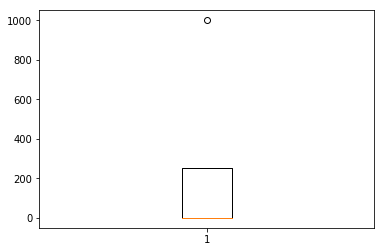

In [202]:
import matplotlib.pyplot as plt
plt.boxplot(O_Imports['Prices'])

# yellow line is the median
# top of the box is 75-percentile

In [203]:
O_Imports[~((O_Imports["Prices"]<q1-1.5*iqr) | (O_Imports["Prices"]>q3+1.5*iqr))]

,Fruits,Prices,Country
0,Apple,1.2,Africa
1,Orange,0.7,Russia
2,Banana,0.9,New Zealand
